
# Modelos Avançados com Python

As **redes neurais e modelos supervisionados avançados** são amplamente utilizados em problemas de **classificação, regressão e reconhecimento de padrões complexos**.

Cada tipo de arquitetura possui **características específicas**, adequadas a determinados tipos de dados e objetivos.

| Modelo | Ideal para | Tipo de Dados | Pontos Fortes |
|:--|:--|:--|:--|
| **DNN (Deep Neural Network)** | Dados tabulares e complexos | Numéricos e categóricos | Captura relações não lineares e interações entre variáveis |
| **CNN (Convolutional Neural Network)** | Imagens, vídeos, sinais espaciais | Matriciais (pixels) | Capta padrões espaciais e visuais |
| **RNN (Recurrent Neural Network)** | Séries temporais e textos | Sequenciais | Capta dependências temporais e contextuais |
| **SVM (Support Vector Machine)** | Dados bem definidos e separáveis | Tabulares, numéricos | Eficiente em conjuntos menores e alta dimensionalidade |

## DNN — Redes Neurais Profundas

As **Deep Neural Networks (DNNs)** são compostas por **múltiplas camadas ocultas** de neurônios artificiais, permitindo a modelagem de **relações altamente não lineares**.

Cada camada aprende **representações progressivamente mais abstratas** dos dados de entrada.

**Vantagens:**
- Excelente desempenho em dados tabulares e numéricos.  
- Aprende relações complexas entre variáveis.  
- Flexível e de fácil implementação com frameworks como TensorFlow e Keras.

**Limitações:**
- Pode superajustar (overfitting) se os dados forem poucos.  
- Requer normalização e ajuste de hiperparâmetros.  

In [5]:
# Classificação de Câncer (Dataset: Breast Cancer)

import tensorflow as tf
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

# Carrega dataset
data = load_breast_cancer()
X, y = data.data, data.target

# Padronização
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Divisão treino/teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Criação da DNN
model = tf.keras.Sequential([
    tf.keras.layers.Dense(64, activation='relu', input_shape=(X.shape[1],)),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

# Compilação e treinamento
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.fit(X_train, y_train, epochs=30, batch_size=16, verbose=1)

# Avaliação
y_pred = (model.predict(X_test) > 0.5).astype("int32")
print("Acurácia:", accuracy_score(y_test, y_pred))

Epoch 1/30


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8784 - loss: 0.4393   
Epoch 2/30
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9559 - loss: 0.1696 
Epoch 3/30
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9731 - loss: 0.1076 
Epoch 4/30
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9856 - loss: 0.0774 
Epoch 5/30
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9900 - loss: 0.0584 
Epoch 6/30
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9824 - loss: 0.0557 
Epoch 7/30
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9804 - loss: 0.0716 
Epoch 8/30
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9762 - loss: 0.0748 
Epoch 9/30
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9885 - loss: 0.0444 
Epoch 10/30
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9891 - loss: 0.0416
Epoch 11/30
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9926 - loss: 0.0345
Epoch 12/30
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9905 - lo

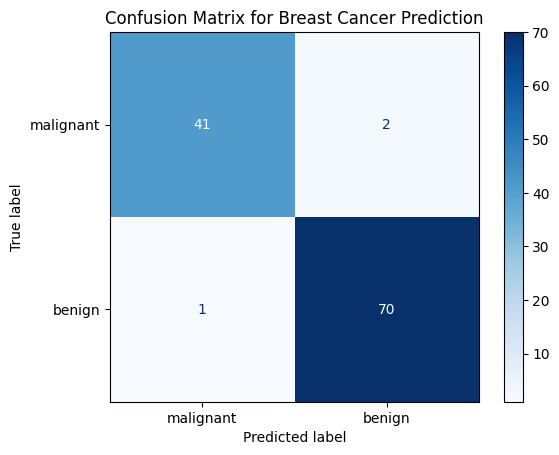

In [7]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

target_names = data.target_names

# Display confusion matrix with labels
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=target_names)
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix for Breast Cancer Prediction')
plt.show()

## CNN — Redes Neurais Convolucionais


As **Convolutional Neural Networks (CNNs)** são projetadas para trabalhar com dados que possuem **estrutura espacial**, como imagens ou vídeos.  
Utilizam **camadas convolucionais** que aplicam **filtros (kernels)** para detectar padrões locais (bordas, texturas, formas).

**Componentes principais:**
- **Camada Convolucional:** extrai padrões locais.  
- **Camada de Pooling:** reduz a dimensionalidade e mantém características relevantes.  
- **Camada densa final:** realiza a classificação.

**Vantagens:**
- Reconhece padrões invariantes de posição.  
- Reduz a necessidade de engenharia manual de características.  
- Escalável e amplamente usada em visão computacional.

**Limitações:**
- Requer mais recursos computacionais.  
- Necessita grande volume de dados.  


In [14]:
# Classificação de Dígitos (MNIST)

import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical

(X_train, y_train), (X_test, y_test) = mnist.load_data()

# Normaliza e ajusta formato
X_train = X_train.reshape(-1, 28, 28, 1) / 255.0
X_test = X_test.reshape(-1, 28, 28, 1) / 255.0
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

# Criação da CNN
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(28,28,1)),
    tf.keras.layers.MaxPooling2D((2,2)),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2,2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

# Compilação e treinamento
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.fit(X_train, y_train, epochs=5, batch_size=64, validation_split=0.1)

# Avaliação
test_loss, test_acc = model.evaluate(X_test, y_test)
print("Acurácia no teste:", test_acc)

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 57s 65ms/step - accuracy: 0.8916 - loss: 0.3725 - val_accuracy: 0.9865 - val_loss: 0.0516
Epoch 2/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 47s 55ms/step - accuracy: 0.9833 - loss: 0.0545 - val_accuracy: 0.9860 - val_loss: 0.0468
Epoch 3/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 85s 59ms/step - accuracy: 0.9895 - loss: 0.0334 - val_accuracy: 0.9888 - val_loss: 0.0360
Epoch 4/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 47s 56ms/step - accuracy: 0.9925 - loss: 0.0247 - val_accuracy: 0.9908 - val_loss: 0.0336
Epoch 5/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 48s 57ms/step - accuracy: 0.9948 - loss: 0.0169 - val_accuracy: 0.9892 - val_loss: 0.0380
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.9873 - loss: 0.0372
Acurácia no teste: 0.9897000193595886


313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step


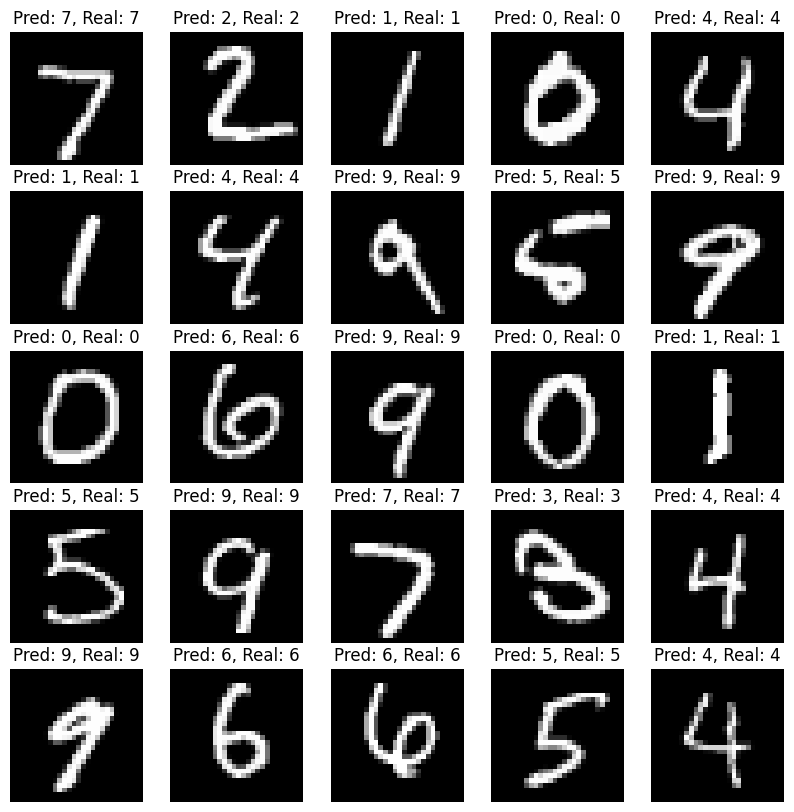

In [17]:
# Make predictions
predictions = model.predict(X_test)

plt.figure(figsize=(10, 10))
for i in range(25):
    plt.subplot(5, 5, i + 1)
    # Reshape X_test_mnist[i] from (28, 28, 1) to (28, 28) for imshow
    plt.imshow(X_test[i].reshape(28, 28), cmap='gray')
    predicted_label = np.argmax(predictions[i])
    true_label = np.argmax(y_test[i]) # Use the original y_test_mnist for true labels
    plt.title(f"Pred: {predicted_label}, Real: {true_label}")
    plt.axis('off')
plt.show()

## RNN — Redes Neurais Recorrentes

As **RNNs (Recurrent Neural Networks)** foram projetadas para processar **dados sequenciais**, onde a ordem das entradas é importante (ex.: séries temporais, textos).  
Elas possuem **conexões recorrentes** que permitem reter **informações anteriores** (memória).

**Variações comuns:**
- **LSTM (Long Short-Term Memory):** evita o problema de gradiente desaparecendo.  
- **GRU (Gated Recurrent Unit):** mais leve e eficiente que LSTM.

**Vantagens:**
- Captura dependências temporais.  
- Ideal para previsões em séries temporais e textos.

**Limitações:**
- Treinamento mais lento.  
- Dificuldade com dependências de longo prazo (parcialmente resolvido com LSTM/GRU).

Epoch 1/15


/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


47/47 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.1211
Epoch 2/15
47/47 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 0.0160
Epoch 3/15
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0024
Epoch 4/15
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0021
Epoch 5/15
47/47 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0020
Epoch 6/15
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0019
Epoch 7/15
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0020
Epoch 8/15
47/47 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0024
Epoch 9/15
47/47 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0020
Epoch 10/15
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0020
Epoch 11/15
47/47 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.0021
Epoch 12/15
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0021
Epoch 13/15
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0020
Epoch 14/15
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0021
Epoch 15/15
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0020
15/15 ━━━━━━━━━

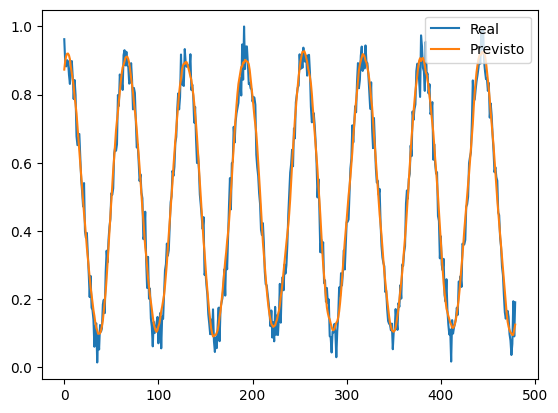

In [18]:
# Previsão de Série Temporal Sintética

import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

# Geração de série temporal
time = np.arange(0, 200, 0.1)
data = np.sin(time) + 0.1 * np.random.randn(len(time))

# Normaliza
scaler = MinMaxScaler()
data_scaled = scaler.fit_transform(data.reshape(-1,1))

# Cria janelas (sequências)
def create_dataset(data, step=10):
    X, y = [], []
    for i in range(len(data)-step):
        X.append(data[i:i+step])
        y.append(data[i+step])
    return np.array(X), np.array(y)

X, y = create_dataset(data_scaled, step=20)
X_train, y_train = X[:1500], y[:1500]
X_test, y_test = X[1500:], y[1500:]

# Criação da RNN LSTM
model = tf.keras.Sequential([
    tf.keras.layers.LSTM(50, activation='tanh', input_shape=(20,1)),
    tf.keras.layers.Dense(1)
])
model.compile(optimizer='adam', loss='mse')
model.fit(X_train, y_train, epochs=15, batch_size=32, verbose=1)

# Avaliação
pred = model.predict(X_test)
plt.plot(y_test, label='Real')
plt.plot(pred, label='Previsto')
plt.legend()
plt.show()

## SVM — Máquinas de Vetores de Suporte

O **SVM (Support Vector Machine)** busca um **hiperplano ótimo** que separa as classes com **máxima margem**.  
Trabalha bem mesmo em **alta dimensionalidade**, utilizando **funções kernel** para transformar dados não lineares em um espaço separável.

**Principais kernels:**
- Linear  
- Polinomial (`poly`)  
- Radial Basis Function (`rbf`)  

**Vantagens:**
- Eficiente em conjuntos pequenos e bem estruturados.  
- Alta precisão com ajustes adequados.

**Limitações:**
- Custo computacional alto para datasets grandes.  
- Difícil ajuste de hiperparâmetros `C` e `gamma`.

Acurácia: 1.0


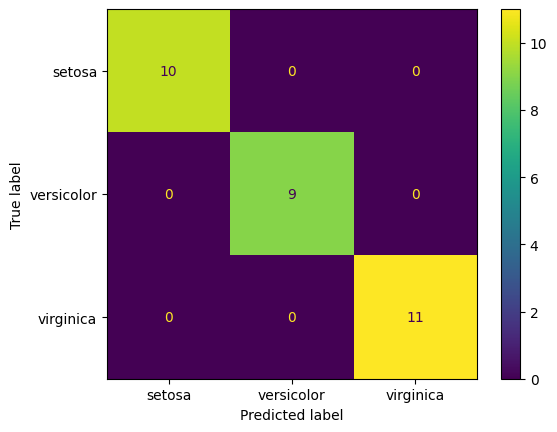

In [19]:
# Classificação no Iris Dataset

from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

iris = datasets.load_iris()
X, y = iris.data, iris.target

scaler = StandardScaler()
X = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

clf = SVC(kernel='rbf', C=1.0, gamma='scale')
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

print("Acurácia:", accuracy_score(y_test, y_pred))
ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred), display_labels=iris.target_names).plot()
plt.show()

## Exercícios Propostos

1. **DNN:**  
   - Aplique a rede ao dataset *Wine* (sklearn).  
   - Teste 2, 3 e 4 camadas ocultas.  
   - Compare tempo e acurácia.

2. **CNN:**  
   - Use o dataset *CIFAR-10*.  
   - Compare o desempenho alterando filtros e camadas.

3. **RNN:**  
   - Gere uma série temporal com tendência crescente.  
   - Compare desempenho de LSTM vs GRU.

4. **SVM:**  
   - Compare os kernels `'linear'`, `'poly'` e `'rbf'`.  
   - Explique visualmente o impacto do parâmetro `C`.

## Conclusão

| Modelo | Melhor uso | Complexidade | Vantagens |
|:--|:--|:--|:--|
| **DNN** | Dados tabulares | Média | Flexível e adaptável |
| **CNN** | Imagens | Alta | Extração automática de padrões visuais |
| **RNN** | Séries temporais | Alta | Capta dependências temporais |
| **SVM** | Dados estruturados pequenos | Média | Alta precisão com poucos dados |